In [33]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt


## CUSTOMER EXPLORATION


In [34]:
customer = pd.read_csv("../data/customers.csv")

### DATA BRIEF

In [35]:
print(f"The shape of the dataset is {customer.shape}")

The shape of the dataset is (2000, 14)


In [36]:
customer.head()

,customer_id,name,email,phone_number,country,city,age,gender,interests,signup_date,last_purchase_date,total_spent,purchase_frequency,churn
0,CUST0001,Laura Hill,patrickcooke@hamilton.com,+1 (830) 982-9806,CA,South Lisa,61,F,"Beauty, Fashion",2022-08-17,2025-02-13,225.82,1.9,0
1,CUST0002,Kimberly Burnett,stonebrenda@hotmail.com,(938) 909-3033,US,Lake Priscilla,33,M,"Books, Sports, Electronics",2022-08-15,2024-04-17,3001.28,4.2,1
2,CUST0003,Abigail West,williamsbailey@hotmail.com,+1 (265) 189-5206,CA,North Tinahaven,45,Other,"Electronics, Sports",2022-12-18,2025-07-05,3934.91,2.1,0
3,CUST0004,Carolyn Rowland,kevinshah@conway.com,+234 690 602 6127,NG,Catherinehaven,49,M,"Books, Home Appliances",2023-03-19,2024-10-03,162.00,2.4,1
4,CUST0005,Amanda Johnson,melissa32@arnold.org,+44 7914 177971,UK,Jorgeburgh,59,F,"Sports, Home Appliances, Beauty",2023-01-09,2023-06-11,2233.89,3.8,1


In [37]:
customer.columns

Index(['customer_id', 'name', 'email', 'phone_number', 'country', 'city',
       'age', 'gender', 'interests', 'signup_date', 'last_purchase_date',
       'total_spent', 'purchase_frequency', 'churn'],
      dtype='object')

### COLUMNS DEBRIEF

1. Personal Identifiable Information: name, email, location (city & country), age, gender , last_purchase_date 

2. Additional Info: customer_id (unique ID), total_spent (on products), purchase_frequency (or number_of_orders), interests (tags/keywords of product interest, Churn(1 = churned, 0 = active))

In [38]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         2000 non-null   object 
 1   name                2000 non-null   object 
 2   email               2000 non-null   object 
 3   phone_number        2000 non-null   object 
 4   country             2000 non-null   object 
 5   city                2000 non-null   object 
 6   age                 2000 non-null   int64  
 7   gender              2000 non-null   object 
 8   interests           2000 non-null   object 
 9   signup_date         2000 non-null   object 
 10  last_purchase_date  2000 non-null   object 
 11  total_spent         2000 non-null   float64
 12  purchase_frequency  2000 non-null   float64
 13  churn               2000 non-null   int64  
dtypes: float64(2), int64(2), object(10)
memory usage: 218.9+ KB


In [39]:
# Descriptive statistics for numerical columns
customer.describe()

,age,total_spent,purchase_frequency,churn
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,43.801500,2557.034085,2.772800,0.745500
std,15.471127,1401.000706,1.293432,0.435689
min,18.000000,100.170000,0.500000,0.000000
25%,30.000000,1387.180000,1.700000,0.000000
50%,44.000000,2529.855000,2.800000,1.000000
75%,57.000000,3772.452500,3.900000,1.000000
max,70.000000,4997.250000,5.000000,1.000000


From the stats above, the youngest & oldest customer by age are 18 & 70 year old respectively. On average customers spend around $2557. And the average purchase frequency is 2.7 (not bad if you would agree...)

In [40]:
# descriptive stats for categorical variables
customer.describe(include="object").T

,count,unique,top,freq
customer_id,2000,2000,CUST0001,1
name,2000,1968,Ashley Thomas,2
email,2000,1998,rjohnson@yahoo.com,2
phone_number,2000,2000,+1 (830) 982-9806,1
country,2000,5,IN,443
city,2000,1869,Lake James,4
gender,2000,3,F,671
interests,2000,154,Books,131
signup_date,2000,673,2022-08-17,11
last_purchase_date,2000,776,2024-11-04,9


 From the object stats, out of 2000 customer data, only 1968 are unqiue which is awkward & deserving a closer look. Same for email. Moving on, it's interesting to break the news that over 5 countries are serviced cutting across 1869 unique cities (with India possessing the highest service outreach). Meawhile, females top our customer leaderboard. Finally, data has it that the most highlighted interest among custoners is Book (is it safe now to say humans still read?...smiles...)

In [41]:
for n in customer.columns:
    print(n + ": ", customer[n].unique())

customer_id:  ['CUST0001' 'CUST0002' 'CUST0003' ... 'CUST1998' 'CUST1999' 'CUST2000']
name:  ['Laura Hill' 'Kimberly Burnett' 'Abigail West' ... 'Ryan Schultz'
 'Tracy Ramos' 'Sharon Krueger']
email:  ['patrickcooke@hamilton.com' 'stonebrenda@hotmail.com'
 'williamsbailey@hotmail.com' ... 'jthomas@murray.com'
 'yscott@hotmail.com' 'ian41@hotmail.com']
phone_number:  ['+1 (830) 982-9806' '(938) 909-3033' '+1 (265) 189-5206' ...
 '(851) 622-9626' '(492) 731-2367' '+1 (424) 597-4611']
country:  ['CA' 'US' 'NG' 'UK' 'IN']
city:  ['South Lisa' 'Lake Priscilla' 'North Tinahaven' ... 'South Scott'
 'West Andrewfurt' 'Lake Willieberg']
age:  [61 33 45 49 59 38 57 31 18 66 62 64 35 41 53 46 70 27 56 55 28 63 60 54
 29 24 67 37 25 50 42 39 32 68 34 40 69 30 48 52 20 47 44 19 23 22 21 36
 51 26 58 43 65]
gender:  ['F' 'M' 'Other']
interests:  ['Beauty, Fashion' 'Books, Sports, Electronics' 'Electronics, Sports'
 'Books, Home Appliances' 'Sports, Home Appliances, Beauty' 'Books'
 'Books, Electroni

You can see the interest column shows each customer can be interested in one or more product type/category

In [42]:
# Convertng date columns to date time format

for col in ["last_purchase_date", "signup_date"]:
    customer[col] = pd.to_datetime(customer[col])

customer.dtypes

customer_id                   object
name                          object
email                         object
phone_number                  object
country                       object
city                          object
age                            int64
gender                        object
interests                     object
signup_date           datetime64[ns]
last_purchase_date    datetime64[ns]
total_spent                  float64
purchase_frequency           float64
churn                          int64
dtype: object

In [43]:
# Visualize unique values for num columns
unique = customer.select_dtypes(exclude="object").nunique()

fig = px.bar(unique, log_y=True, title="Number of Numerical Unique values")
fig.update_xaxes(categoryorder="total descending")
fig.show()

# QUALITY INVESTIGATION

In [44]:
# Checking for duplicates

duplicates = customer.duplicated().sum()

print(f"There are {duplicates} duplicates in the dataset")

There are 0 duplicates in the dataset


Remember, we do want to investigate why the name & email column aren't all unique and since there are no dupicates then we have to look deeper to find answers.

In [45]:
customer["name"].value_counts()

name
Ashley Thomas        2
Michael Garcia       2
Deborah Hernandez    2
Samuel Anderson      2
Michael Jackson      2
                    ..
Joseph Morris        1
Jeffrey Ellis        1
Kenneth Wong         1
Matthew Gross        1
Amy Costa            1
Name: count, Length: 1968, dtype: int64

What could be the reason for duplicate names? But for double naming convention, it's logical to find duplicate name bearers. Let's confirm below

In [46]:
print(customer[customer["name"] == "Ashley Thomas"])

print(customer[customer["name"] == "Michael Garcia"])

    customer_id           name                        email  \
518    CUST0519  Ashley Thomas  margaretrussell@hotmail.com   
657    CUST0658  Ashley Thomas          haroldlee@gmail.com   

          phone_number country            city  age gender  \
518  +234 659 228 1005      NG     West Amanda   50      M   
657  +1 (412) 806-2047      CA  West Frankview   34      M   

                   interests signup_date last_purchase_date  total_spent  \
518                  Fashion  2022-08-09         2023-04-03      1137.51   
657  Sports, Home Appliances  2023-01-16         2024-04-20      3752.04   

     purchase_frequency  churn  
518                 4.6      1  
657                 3.0      1  
     customer_id            name                    email     phone_number  \
744     CUST0745  Michael Garcia  millerlindsey@gmail.com   (113) 314-5879   
1016    CUST1017  Michael Garcia     isanders@hotmail.com  +44 9696 669054   

     country        city  age gender interests signup_date l

As seen, the duplicates are not entirely the same customers. For example, there's Ashley Thomas from Nigeria & other from Canada

In [47]:
# Investigation email uniqueness

customer["email"].value_counts()

email
rjohnson@yahoo.com                 2
qowens@gmail.com                   2
patrickcooke@hamilton.com          1
stonebrenda@hotmail.com            1
williamsbailey@hotmail.com         1
                                  ..
michaelhart@hotmail.com            1
smolina@hotmail.com                1
westmichelle@bruce-bradford.net    1
qwashington@foley-glover.info      1
ian41@hotmail.com                  1
Name: count, Length: 1998, dtype: int64

Let's also see why there are two same emails

In [48]:
print(customer[customer["email"] == "rjohnson@yahoo.com"])

print(customer[customer["email"] == "qowens@gmail.com"])

     customer_id                name               email     phone_number  \
875     CUST0876   Jacqueline Torres  rjohnson@yahoo.com  +91 9645532 538   
1693    CUST1694  Catherine Robinson  rjohnson@yahoo.com   (472) 471-2920   

     country         city  age gender                             interests  \
875       IN  Hansonshire   70      M                       Home Appliances   
1693      US    Jamesport   56  Other  Electronics, Home Appliances, Beauty   

     signup_date last_purchase_date  total_spent  purchase_frequency  churn  
875   2024-01-24         2024-08-09      2356.41                 0.8      1  
1693  2024-06-04         2025-07-19      1700.28                 0.7      0  
     customer_id                  name             email       phone_number  \
491     CUST0492  Christopher Delacruz  qowens@gmail.com  +234 154 217 2462   
1778    CUST1779      Cassandra Harper  qowens@gmail.com  +1 (502) 314-2278   

     country                city  age gender interests sig

Like the name column, there's a similar outcome. Both email holders are entirely different people but it isn't proper for more than one person to hare an email. This is would impact our marketing outreach as we don't who owns the correct email contact. In a business sense, we can forward ther details to the data acquisition dept to reach out and correct this error (since they are just four number)...meanwhile these individuals would be omitted during email campaigns until corection is effected. 

In [49]:
# checking for missing values

px.imshow(customer.isna(), color_continuous_scale=["white", "red"])

In [50]:
nans = customer.isna().sum()

print(f"There are {nans.sum()} missing values in the dataset")
print(nans)

There are 0 missing values in the dataset
customer_id           0
name                  0
email                 0
phone_number          0
country               0
city                  0
age                   0
gender                0
interests             0
signup_date           0
last_purchase_date    0
total_spent           0
purchase_frequency    0
churn                 0
dtype: int64


## OUTLIERS

In [55]:
# Analyze all numerical columns for outliers except churn & purchase frequency columns which have capped values. 
px.box(customer, y="total_spent", title="Outlier in Total Spent", labels={"x": "Feature", "y": ""})

No outlier detected

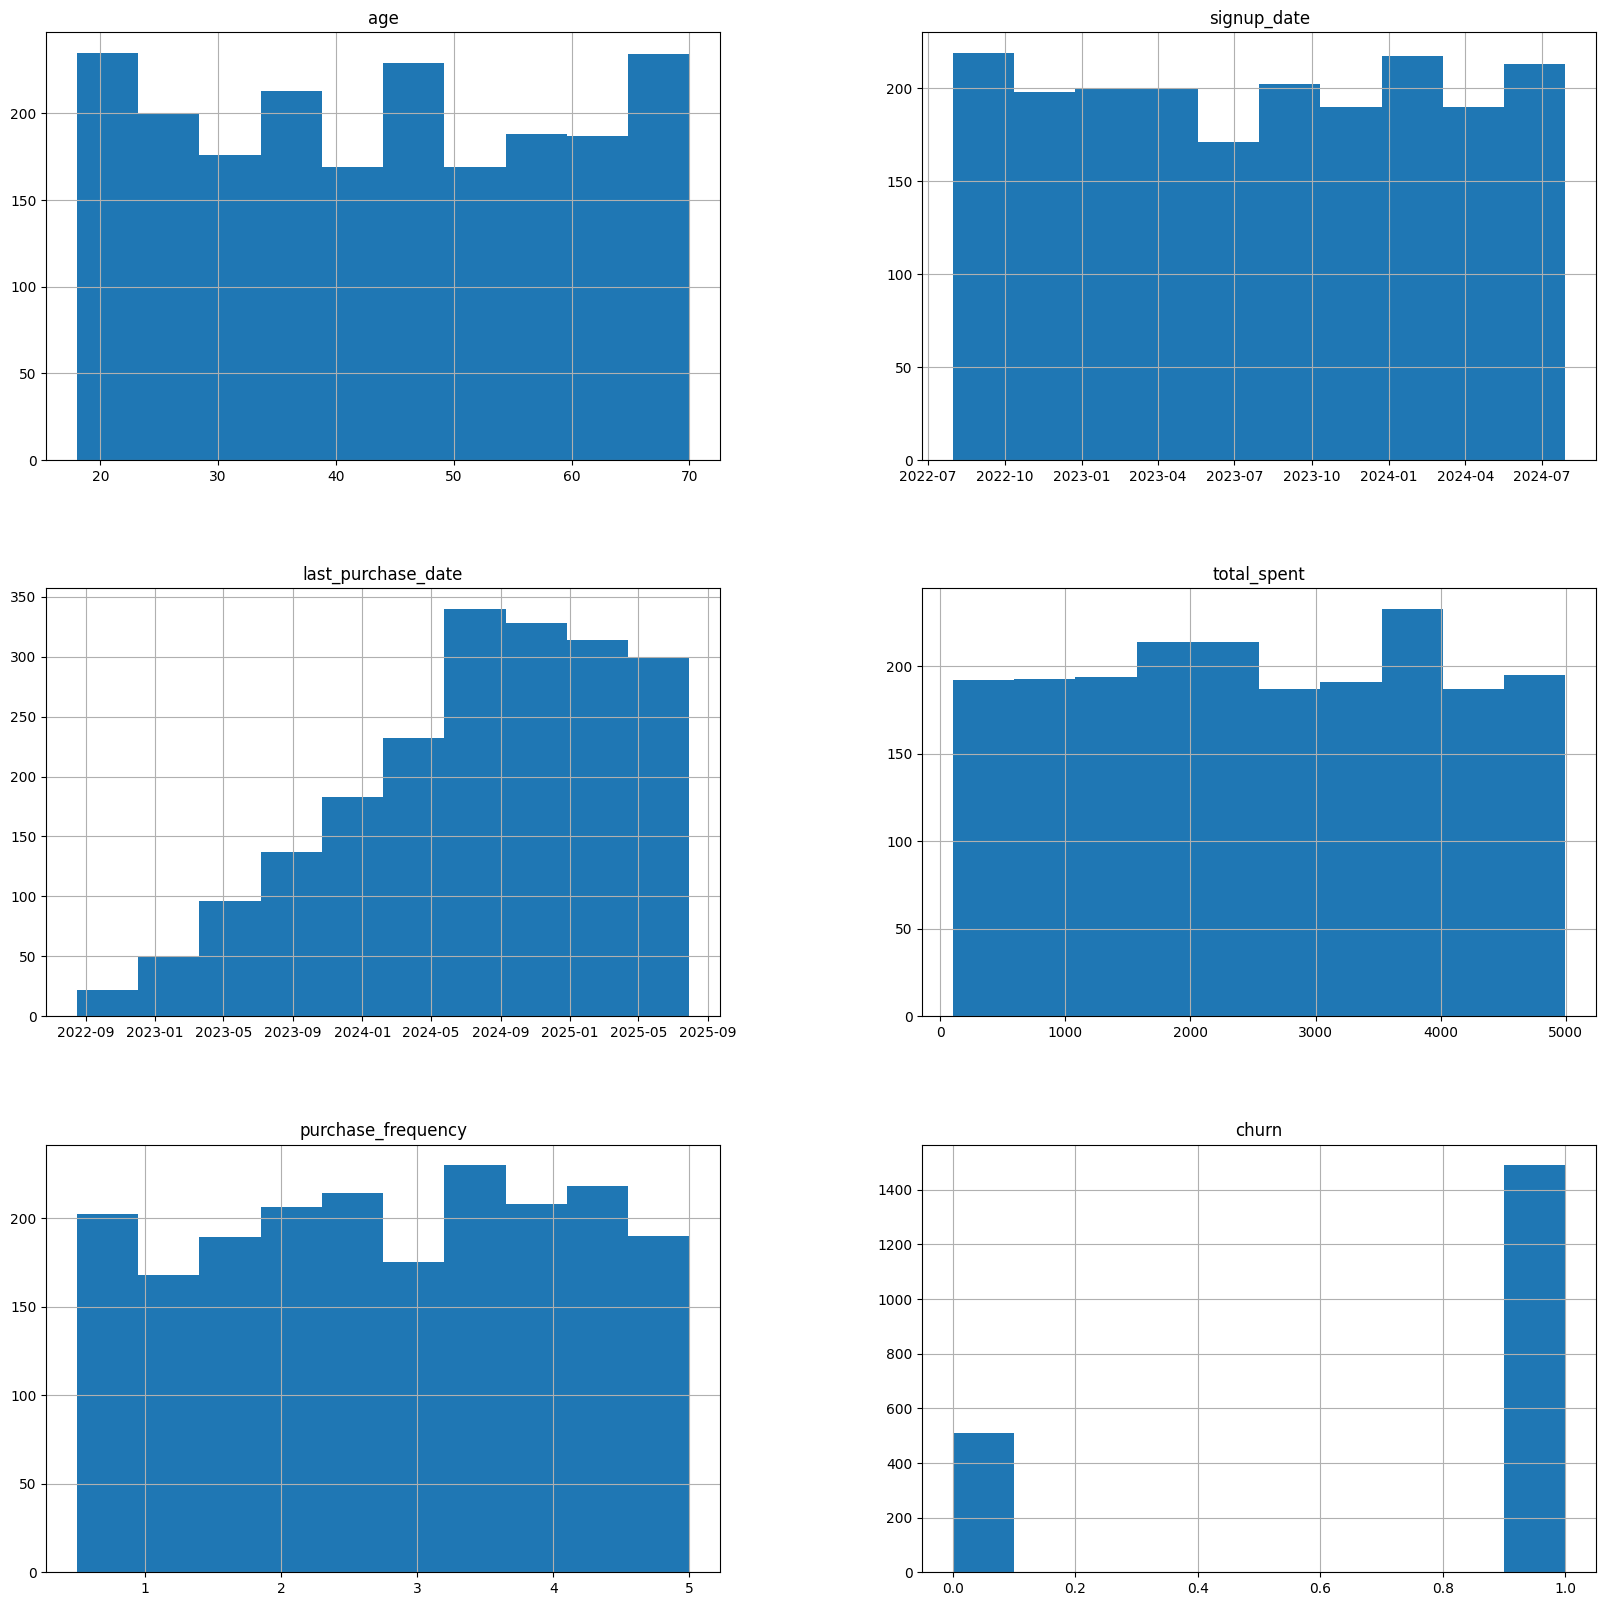

In [56]:
customer.hist(figsize=(20, 20), bins=10)
plt.show()

In [58]:
px.histogram(customer,'churn',facet_col='gender', color='churn', marginal='rug')

In [59]:
px.histogram(customer, x="churn", color="churn", facet_col="country")

## FEATURE RELATIONSHIP

In [62]:
num_df = customer.select_dtypes(exclude="object")
px.imshow(num_df.corr())

No sign of multi-colinearity among the features as indicated by the the color grades

LABEL ENCODING

In [65]:
cat_cols = customer.select_dtypes("object").drop("customer_id", axis=1).columns.values
cat_cols

array(['name', 'email', 'phone_number', 'country', 'city', 'gender',
       'interests'], dtype=object)

In [63]:
customer.head()

,customer_id,name,email,phone_number,country,city,age,gender,interests,signup_date,last_purchase_date,total_spent,purchase_frequency,churn
0,CUST0001,Laura Hill,patrickcooke@hamilton.com,+1 (830) 982-9806,CA,South Lisa,61,F,"Beauty, Fashion",2022-08-17,2025-02-13,225.82,1.9,0
1,CUST0002,Kimberly Burnett,stonebrenda@hotmail.com,(938) 909-3033,US,Lake Priscilla,33,M,"Books, Sports, Electronics",2022-08-15,2024-04-17,3001.28,4.2,1
2,CUST0003,Abigail West,williamsbailey@hotmail.com,+1 (265) 189-5206,CA,North Tinahaven,45,Other,"Electronics, Sports",2022-12-18,2025-07-05,3934.91,2.1,0
3,CUST0004,Carolyn Rowland,kevinshah@conway.com,+234 690 602 6127,NG,Catherinehaven,49,M,"Books, Home Appliances",2023-03-19,2024-10-03,162.00,2.4,1
4,CUST0005,Amanda Johnson,melissa32@arnold.org,+44 7914 177971,UK,Jorgeburgh,59,F,"Sports, Home Appliances, Beauty",2023-01-09,2023-06-11,2233.89,3.8,1
